In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRFRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def score_data(X,y,model = XGBRFRegressor()):
    for cols in X.select_dtypes(["category","object"]):
        X[cols], _ = X[cols].factorize()
    score = cross_val_score(
        model,
        X,y,cv=5,
        scoring="neg_mean_squared_log_error",
    )
    score = -1*score.mean()
    score = np.sqrt(score)
    return score

In [3]:
df = pd.read_csv('./ames.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2.0,Unf,0.0,441.0,1080.0,GasA,Fair,Y,SBrkr,1656.0,0.0,0.0,1656.0,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528.0,Typical,Typical,Partial_Pavement,210.0,62.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6.0,LwQ,144.0,270.0,882.0,GasA,Typical,Y,SBrkr,896.0,0.0,0.0,896.0,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730.0,Typical,Typical,Paved,140.0,0.0,0.0,0.0,120.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1.0,Unf,0.0,406.0,1329.0,GasA,Typical,Y,SBrkr,1329.0,0.0,0.0,1329.0,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312.0,Typical,Typical,Paved,393.0,36.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1.0,Unf,0.0,1045.0,2110.0,GasA,Excellent,Y,SBrkr,2110.0,0.0,0.0,2110.0,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522.0,Typical,Typical,Paved,0.0,0.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Typical,Typical,PConc,Good,Typical,No,GLQ,3.0,Unf,0.0,137.0,928.0,GasA,Good,Y,SBrkr,928.0,701.0,0.0,1629.0,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482.0,Typical,Typical,Paved,212.0,34.0,0.0,0.0,0.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


In [5]:
X = df.copy()
y = X.pop("SalePrice")

features = [
    "LotArea",
    "TotalBsmtSF",
    "FirstFlrSF",
    "SecondFlrSF",
    "GrLivArea",
]

X_scaled = X.loc[:,features]


X_scaled.head()

,LotArea,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea
0,31770.0,1080.0,1656.0,0.0,1656.0
1,11622.0,882.0,896.0,0.0,896.0
2,14267.0,1329.0,1329.0,0.0,1329.0
3,11160.0,2110.0,2110.0,0.0,2110.0
4,13830.0,928.0,928.0,701.0,1629.0


In [6]:
X_scaled = (X_scaled - X_scaled.mean(axis = 0)) / X_scaled.std(axis=0)
X_scaled.head()

,LotArea,TotalBsmtSF,FirstFlrSF,SecondFlrSF,GrLivArea
0,2.743912,0.065185,1.266787,-0.783052,0.309212
1,0.187065,-0.383827,-0.672528,-0.783052,-1.194223
2,0.522724,0.629852,0.432371,-0.783052,-0.337661
3,0.128436,2.400955,2.425273,-0.783052,1.207317
4,0.467268,-0.279511,-0.590873,0.853286,0.255801


In [7]:
k = KMeans(n_clusters=10, n_init=10, random_state= 0)
X["Cluster"] = k.fit_predict(X_scaled)


In [8]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Cluster
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2.0,Unf,0.0,441.0,1080.0,GasA,Fair,Y,SBrkr,1656.0,0.0,0.0,1656.0,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528.0,Typical,Typical,Partial_Pavement,210.0,62.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,8
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6.0,LwQ,144.0,270.0,882.0,GasA,Typical,Y,SBrkr,896.0,0.0,0.0,896.0,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730.0,Typical,Typical,Paved,140.0,0.0,0.0,0.0,120.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,2
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1.0,Unf,0.0,406.0,1329.0,GasA,Typical,Y,SBrkr,1329.0,0.0,0.0,1329.0,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312.0,Typical,Typical,Paved,393.0,36.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,1
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1.0,Unf,0.0,1045.0,2110.0,GasA,Excellent,Y,SBrkr,2110.0,0.0,0.0,2110.0,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522.0,Typical,Typical,Paved,0.0,0.0,0.0,0.0,0.0,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,9
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Typical,Typical,PConc,Good,Typical,No,GLQ,3.0,Unf,0.0,137.0,928.0,GasA,Good,Y,SBrkr,928.0,701.0,0.0,1629.0,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482.0,Typical,Typical,Paved,212.0,34.0,0.0,0.0,0.0,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,7


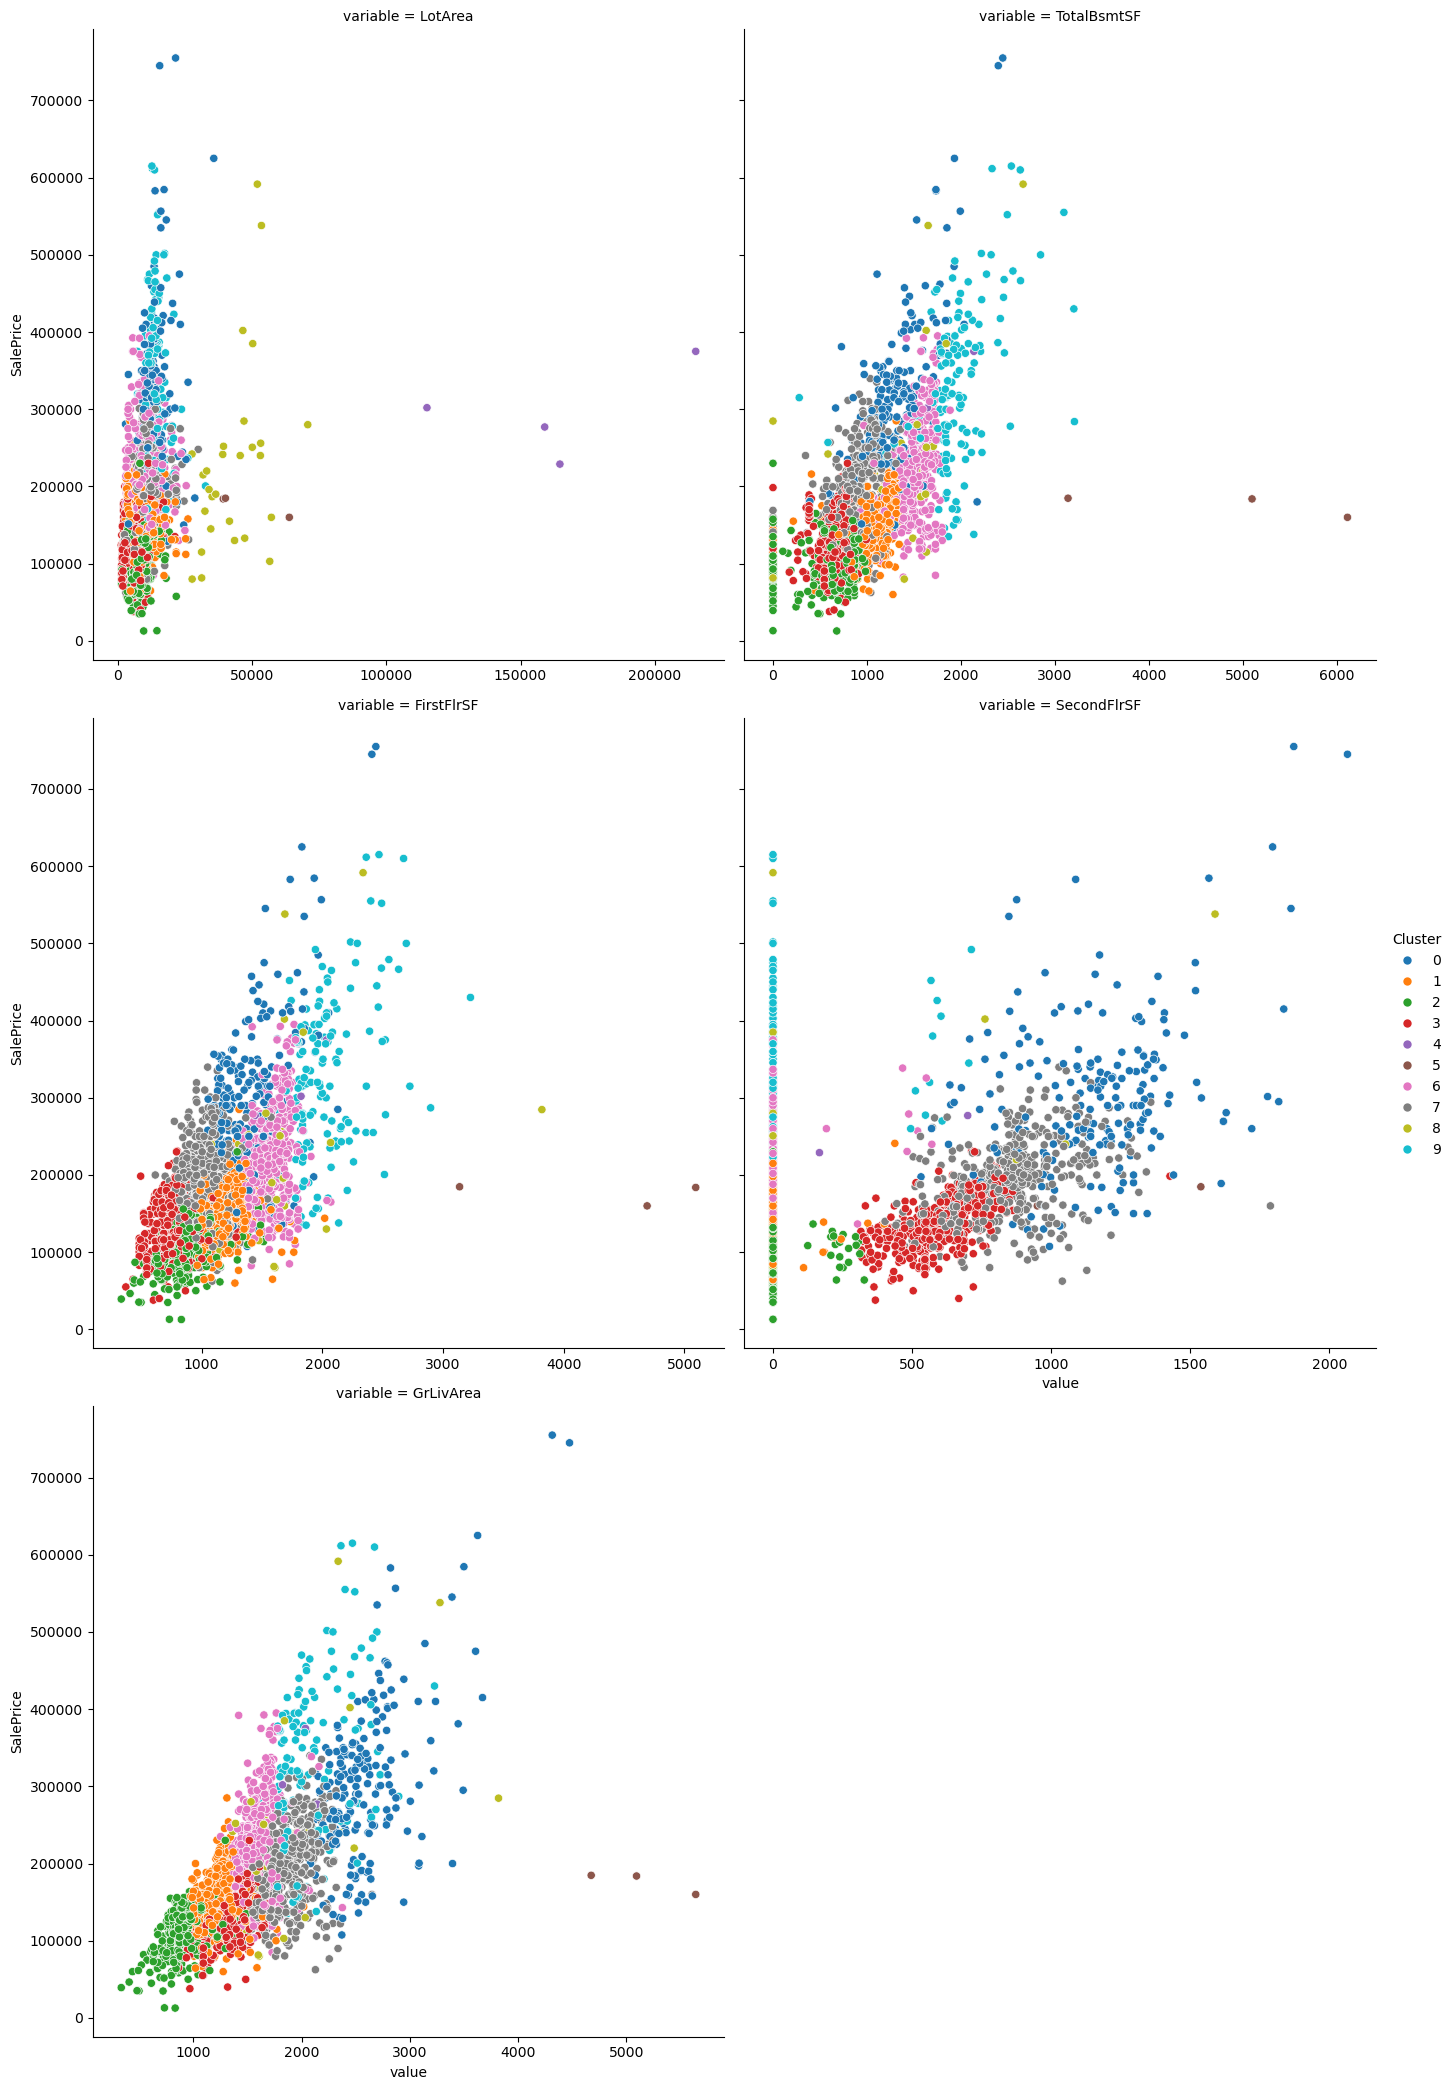

In [17]:
Xy = X.copy()
Xy['Cluster'] = Xy.Cluster.astype("category")
Xy['SalePrice'] = y

sns.relplot(
    x = "value",
    y = "SalePrice",
    hue = "Cluster",
    col = "variable",
     height=7, aspect=1, facet_kws={'sharex': False}, col_wrap=2,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
)

In [22]:
score_data(X,y)

0.16338729187199053

In [25]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Cluster,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,141.0,31770.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1960,1960,0,0,0,0,0,112.0,0,0,0,0,0,0,0,2.0,0,0.0,441.0,1080.0,0,0,...,0,3,1,0,7,0,2,0,0,0,2,528.0,0,0,0,210.0,62.0,0.0,0.0,0.0,0.0,0,0,-1,0.0,5,2010,0,0,8,4.134181,3.236678,3.977023,4.316398,16.792665,13.097627,2.870851,3.789935,1.604330,3.315926
1,0,1,80.0,11622.0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1961,1961,1,0,1,1,-1,0.0,0,0,0,0,1,1,1,6.0,1,144.0,270.0,882.0,0,1,...,0,2,1,0,5,0,0,1,0,1,1,730.0,0,0,1,140.0,0.0,0.0,0.0,120.0,0.0,0,1,-1,0.0,6,2010,0,0,2,4.615628,1.075352,0.621685,1.885029,19.594509,15.785445,2.575580,2.745164,4.932333,4.508933
2,0,0,81.0,14267.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1958,1958,0,0,2,2,1,108.0,0,0,0,0,1,1,2,1.0,0,0.0,406.0,1329.0,0,1,...,1,3,1,1,6,0,0,1,0,1,1,312.0,0,0,1,393.0,36.0,0.0,0.0,0.0,0.0,0,0,0,12500.0,6,2010,0,0,1,3.707220,0.953832,2.157567,2.713650,19.030448,14.058973,0.975653,2.618381,3.927018,2.780135
3,0,0,93.0,11160.0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1968,1968,0,0,0,3,-1,0.0,1,0,0,0,1,1,2,1.0,0,0.0,1045.0,2110.0,0,2,...,1,3,1,2,8,0,2,2,0,0,2,522.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-1,0.0,4,2010,0,0,9,3.874506,3.792481,5.085077,5.236814,19.392116,11.373003,2.243512,4.444882,4.673607,0.508460
4,1,0,74.0,13830.0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1997,1998,1,0,1,1,-1,0.0,0,0,1,1,1,1,3,3.0,0,0.0,137.0,928.0,0,3,...,1,3,1,0,6,0,1,2,0,0,2,482.0,0,0,1,212.0,34.0,0.0,0.0,0.0,0.0,0,1,-1,0.0,3,2010,0,0,7,2.651716,2.070336,2.337714,1.306043,19.225117,14.749591,2.660527,0.733775,4.390193,4.103626


In [23]:
k = KMeans(n_clusters=10, n_init=10, random_state=0)
x_cd = k.fit_transform(X_scaled)

x_cd = pd.DataFrame(x_cd, columns=[f"Centroid_{i}" for i in range(x_cd.shape[1])])
X = X.join(x_cd)

In [24]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,Threeseasonporch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,Cluster,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,141.0,31770.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1960,1960,0,0,0,0,0,112.0,0,0,0,0,0,0,0,2.0,0,0.0,441.0,1080.0,0,0,...,0,3,1,0,7,0,2,0,0,0,2,528.0,0,0,0,210.0,62.0,0.0,0.0,0.0,0.0,0,0,-1,0.0,5,2010,0,0,8,4.134181,3.236678,3.977023,4.316398,16.792665,13.097627,2.870851,3.789935,1.604330,3.315926
1,0,1,80.0,11622.0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1961,1961,1,0,1,1,-1,0.0,0,0,0,0,1,1,1,6.0,1,144.0,270.0,882.0,0,1,...,0,2,1,0,5,0,0,1,0,1,1,730.0,0,0,1,140.0,0.0,0.0,0.0,120.0,0.0,0,1,-1,0.0,6,2010,0,0,2,4.615628,1.075352,0.621685,1.885029,19.594509,15.785445,2.575580,2.745164,4.932333,4.508933
2,0,0,81.0,14267.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1958,1958,0,0,2,2,1,108.0,0,0,0,0,1,1,2,1.0,0,0.0,406.0,1329.0,0,1,...,1,3,1,1,6,0,0,1,0,1,1,312.0,0,0,1,393.0,36.0,0.0,0.0,0.0,0.0,0,0,0,12500.0,6,2010,0,0,1,3.707220,0.953832,2.157567,2.713650,19.030448,14.058973,0.975653,2.618381,3.927018,2.780135
3,0,0,93.0,11160.0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1968,1968,0,0,0,3,-1,0.0,1,0,0,0,1,1,2,1.0,0,0.0,1045.0,2110.0,0,2,...,1,3,1,2,8,0,2,2,0,0,2,522.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-1,0.0,4,2010,0,0,9,3.874506,3.792481,5.085077,5.236814,19.392116,11.373003,2.243512,4.444882,4.673607,0.508460
4,1,0,74.0,13830.0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1997,1998,1,0,1,1,-1,0.0,0,0,1,1,1,1,3,3.0,0,0.0,137.0,928.0,0,3,...,1,3,1,0,6,0,1,2,0,0,2,482.0,0,0,1,212.0,34.0,0.0,0.0,0.0,0.0,0,1,-1,0.0,3,2010,0,0,7,2.651716,2.070336,2.337714,1.306043,19.225117,14.749591,2.660527,0.733775,4.390193,4.103626


In [26]:
score_data(X,y)

0.15796219150507265